In [1]:
import glob
import os
import json

In [2]:
input_path = "data_profiles_json/"
json_files = glob.glob(os.path.join(input_path,'*.json'))
print(len(json_files))

69


# Analysis: About

In [12]:
# detect language
from langdetect import detect
# translate language
from translate import Translator
from deep_translator import GoogleTranslator

from nltk.tokenize import sent_tokenize, word_tokenize
import nltk

from gensim.corpora import Dictionary

from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
model = AutoModelForSeq2SeqLM.from_pretrained("Helsinki-NLP/opus-mt-en-ROMANCE")
tokenizer = AutoTokenizer.from_pretrained("Helsinki-NLP/opus-mt-en-ROMANCE")

/home/evelinamorim/BrasileirasPLN/linkedinScraper/venv/lib/python3.10/site-packages/transformers/models/marian/tokenization_marian.py:194: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


In [14]:
#translator = GoogleTranslator(source='en', target='pt')
tokenizer.supported_language_codes

['>>fr<<',
 '>>es<<',
 '>>it<<',
 '>>pt<<',
 '>>pt_br<<',
 '>>ro<<',
 '>>ca<<',
 '>>gl<<',
 '>>pt_BR<<',
 '>>la<<',
 '>>wa<<',
 '>>fur<<',
 '>>oc<<',
 '>>fr_CA<<',
 '>>sc<<',
 '>>es_ES<<',
 '>>es_MX<<',
 '>>es_AR<<',
 '>>es_PR<<',
 '>>es_UY<<',
 '>>es_CL<<',
 '>>es_CO<<',
 '>>es_CR<<',
 '>>es_GT<<',
 '>>es_HN<<',
 '>>es_NI<<',
 '>>es_PA<<',
 '>>es_PE<<',
 '>>es_VE<<',
 '>>es_DO<<',
 '>>es_EC<<',
 '>>es_SV<<',
 '>>an<<',
 '>>pt_PT<<',
 '>>frp<<',
 '>>lad<<',
 '>>vec<<',
 '>>fr_FR<<',
 '>>co<<',
 '>>it_IT<<',
 '>>lld<<',
 '>>lij<<',
 '>>lmo<<',
 '>>nap<<',
 '>>rm<<',
 '>>scn<<',
 '>>mwl<<']

In [16]:
about_txt_lst = []

for jfile in json_files:
    with open(jfile, "r") as fd_json:
        data = json.load(fd_json)
        if "about" in data:
            about = data["about"].pop()[0]
            lang = detect(about)
            if lang == "pt":
                about_txt_lst.append([about])
            else:
                
                sent_lst = sent_tokenize(about)
                sent_lst = [">>pt<< " + sent for sent in sent_lst]
                
                # tokenizando as sentenças
                encoded = tokenizer(sent_lst, return_tensors='pt', padding=True)
                
                # traduzindo
                about_translation = model.generate(**encoded)
                # preparando a saída
                output = tokenizer.batch_decode(about_translation, skip_special_tokens=True)
                
                about_txt_lst.append(output)
        

In [17]:
print(about_txt_lst)

[['Doutorado.', 'em Ciência da Computação.', 'Especialista em Processamento de Língua Natural, representação de conhecimentos e extração de informações.', 'Eu trabalhei para empresas multiculturais em todo o mundo desenvolvendo ferramentas de processamento de linguagem para jornalismo digital, mídia social, moda e varejo.'], ['Rossana Cunha é estudante de doutorado na Universidade Federal de Minas Gerais (UFMG).', 'Aconselhamento do professor Fábio Alves e Ph.D.', 'Professora Adriana Pagano e Ph.D. Thiago Castro Ferreira co-advisão.', 'É pesquisadora do Laboratório de Experimentação em Tradução (LETRA/UFMG).', 'Possui Licenciatura em Ciências da Computação (Universidade Federal do Para), Licenciatura em Inglês e Licenciatura em Estudos de Tradução (Universidade Federal de Santa Catarina).', 'Suas principais áreas de interesse e pesquisa incluem geração de linguagem natural, processamento de linguagem natural, IA conversacional, simplificação de texto, tradução automática, e os cruzamen

In [18]:
# pre-processing 
import string
stopwords = nltk.corpus.stopwords.words('portuguese')

data_lst = []
for doc in about_txt_lst:
    for sent in doc:
        tok_lst = word_tokenize(sent.lower())
        tok_lst = [tok for tok in tok_lst if tok not in stopwords]
        tok_lst = [tok for tok in tok_lst if tok not in string.punctuation]
        data_lst.append(tok_lst)

In [19]:
print(len(data_lst))

120


In [20]:
dct = Dictionary(data_lst)
dct.save("dict_about")

In [21]:
dct = Dictionary.load("dict_about")
print(dct.cfs)

{0: 7, 1: 14, 2: 21, 4: 6, 9: 22, 7: 15, 8: 24, 10: 3, 3: 4, 5: 4, 6: 3, 23: 4, 13: 5, 18: 1, 22: 2, 19: 1, 11: 2, 14: 2, 16: 14, 15: 1, 12: 6, 20: 1, 21: 1, 17: 1, 24: 1, 30: 1, 25: 1, 26: 4, 32: 27, 27: 14, 29: 2, 28: 2, 31: 2, 33: 1, 37: 7, 35: 1, 34: 1, 36: 1, 44: 6, 38: 1, 42: 1, 43: 2, 45: 1, 39: 1, 41: 1, 40: 1, 49: 2, 47: 1, 46: 1, 50: 4, 48: 1, 56: 3, 55: 4, 52: 9, 54: 4, 53: 3, 57: 2, 51: 2, 68: 2, 71: 13, 66: 8, 67: 20, 64: 1, 61: 4, 63: 3, 59: 1, 69: 1, 70: 3, 58: 2, 60: 1, 65: 1, 62: 1, 72: 2, 73: 7, 77: 8, 76: 1, 78: 7, 75: 3, 74: 3, 83: 1, 82: 16, 85: 5, 88: 4, 80: 1, 84: 1, 86: 3, 81: 2, 87: 1, 79: 17, 91: 3, 89: 2, 90: 3, 95: 1, 92: 1, 93: 4, 94: 3, 97: 3, 96: 4, 98: 1, 102: 10, 99: 1, 101: 1, 100: 6, 103: 1, 112: 2, 110: 1, 113: 1, 108: 1, 109: 1, 111: 7, 105: 1, 106: 1, 104: 2, 107: 1, 114: 2, 116: 4, 115: 2, 117: 1, 120: 11, 122: 2, 121: 6, 119: 2, 118: 2, 126: 1, 127: 1, 124: 1, 129: 2, 128: 1, 123: 2, 125: 2, 130: 1, 131: 2, 132: 2, 134: 9, 133: 2, 136: 8, 140: 2,

In [22]:
hist = []
for idx, tok in dct.iteritems():
    hist.append((tok, dct.cfs[idx]))

In [23]:
hist = sorted(hist, key=lambda x:x[1])

In [24]:
print(hist)

[('jornalismo', 1), ('moda', 1), ('multiculturais', 1), ('mundo', 1), ('mídia', 1), ('social', 1), ('varejo', 1), ('cunha', 1), ('rossana', 1), ('aconselhamento', 1), ('alves', 1), ('fábio', 1), ('ph.d', 1), ('adriana', 1), ('castro', 1), ('co-advisão', 1), ('ferreira', 1), ('pagano', 1), ('thiago', 1), ('experimentação', 1), ('laboratório', 1), ('letra/ufmg', 1), ('conversacional', 1), ('cruzamentos', 1), ('humano-computador', 1), ('incluem', 1), ('interação', 1), ('simplificação', 1), ('pesc/coppe/ufrj', 1), ('boas', 1), ('forte', 1), ('habilidades', 1), ('quatro', 1), ('ensinei', 1), ('ic/ufrj', 1), ('bolsa', 1), ('completar', 1), ('estágio', 1), ('obrigatório', 1), ('estudantil', 1), ('importante', 1), ('internacional', 1), ('melhor', 1), ('prêmio', 1), ('recentes', 1), ('vencedor', 1), ('datasets', 1), ('envolvo', 1), ('pessoa', 1), ('pró-activa', 1), ('tipos', 1), ('voluntárias', 1), ('aplicada', 1), ('emprega', 1), ('aprendi', 1), ('clara', 1), ('fácil', 1), ('transferir', 1), (

In [25]:
# word cloud
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [26]:
text = []
for tok, freq in hist:
    for i in range(freq):
        text.append(tok)
text = " ".join(text)

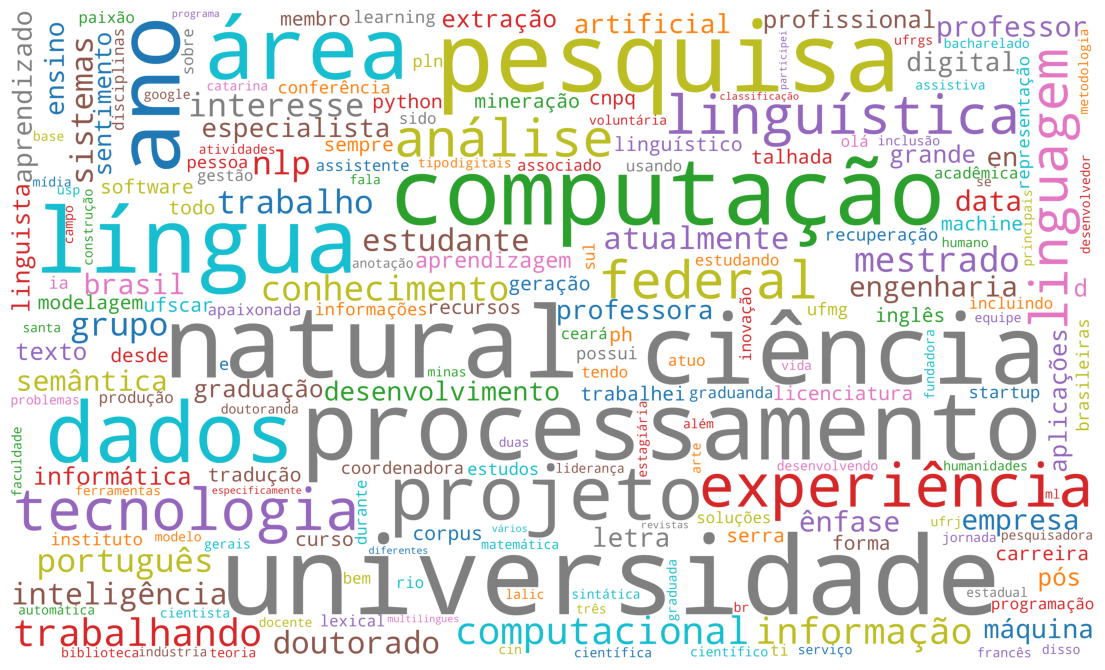

In [27]:
# Generate word cloud
word_cloud = WordCloud(
        width=5000,
        height=3000,
        max_font_size=500,
        random_state=1,
        background_color="white",
        colormap="tab10",
        collocations=False
        ).generate(text)

# Display the generated Word Cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(word_cloud)
plt.axis("off")
plt.show()

fig.savefig("word_cloud_about.png")

# Analysis about current position : academia vs industry

In [28]:
position_txt_lst = []

for jfile in json_files:
    with open(jfile, "r") as fd_json:
        data = json.load(fd_json)
        if "current_position" in data:
            position_txt_lst.append(data["current_position"])

In [29]:
len(position_txt_lst)

69

In [30]:
pos_freq = {}
academia_lst = []
market_lst = []
for pos_field in position_txt_lst:
    
    if "uf" in pos_field.lower():
        academia_lst.append(pos_field)
    elif "phd" in pos_field.lower():
        academia_lst.append(pos_field)
    elif "professor" in pos_field.lower():
        academia_lst.append(pos_field)
    elif "universidade" in pos_field.lower():
        academia_lst.append(pos_field)
    elif "university" in pos_field.lower():
        academia_lst.append(pos_field)
    elif "msc" in pos_field.lower():
        academia_lst.append(pos_field)
    else:
        print("-->", pos_field)
        market_lst.append(pos_field)
    
        
    pos_lst = pos_field.lower().split("|")
    
    for pos in pos_lst:
        pos_txt = pos.strip()
        
        if pos_txt in pos_freq:
            pos_freq[pos_txt] += 1
        else:
            pos_freq[pos_txt] = 1

--> Researcher at Insight Data Science Lab
--> Estudante de  Ciência de Dados- Fatec Rubens Lara| 
Bacharel em Direito.
--> Deep Learning Solutions Architect at NVIDIA
--> Open Innovation | NLP | Computational Linguistics | Applied Research
--> Analista de Inteligência Artificial Sr na americanas s.a
--> Computational Linguist | Data Analyst | NLP
--> Software Engineer | Data Science | Data Analyst |  Big Data Analyst | IT Project Manager | Business Analyst
--> --
--> Cientista de PLN
--> Linguista Computacional | Analista de Inteligência Artificial na americanas s.a.
--> brainstormer  at Topos Institute
--> Linguist | Speech Scientist | Data Science enthusiast | AI and Machine Learning student | NLP | Agile
--> Digital Marketing | Paid Media | Marketing | Performance
--> Educação | Design e Produção de Conteúdo | Produtos e Projetos Educacionais | Impacto Social
--> Doctoral Researcher at SSHOC - Social Sciences and Humanities Open Cloud
--> NLP Team Lead | Computational Linguist| Sen

In [31]:
for pos in market_lst:
    print(pos)
print(len(market_lst))

Researcher at Insight Data Science Lab
Estudante de  Ciência de Dados- Fatec Rubens Lara| 
Bacharel em Direito.
Deep Learning Solutions Architect at NVIDIA
Open Innovation | NLP | Computational Linguistics | Applied Research
Analista de Inteligência Artificial Sr na americanas s.a
Computational Linguist | Data Analyst | NLP
Software Engineer | Data Science | Data Analyst |  Big Data Analyst | IT Project Manager | Business Analyst
--
Cientista de PLN
Linguista Computacional | Analista de Inteligência Artificial na americanas s.a.
brainstormer  at Topos Institute
Linguist | Speech Scientist | Data Science enthusiast | AI and Machine Learning student | NLP | Agile
Digital Marketing | Paid Media | Marketing | Performance
Educação | Design e Produção de Conteúdo | Produtos e Projetos Educacionais | Impacto Social
Doctoral Researcher at SSHOC - Social Sciences and Humanities Open Cloud
NLP Team Lead | Computational Linguist| Senior Analyst| Compass UOL
Cientista de Dados em Take Blip | Lingu

In [32]:
for pos in academia_lst:
    print(pos)
print(len(academia_lst)) # 31 - 4 = 27

Natural Language Processing | Knowledge Representation |  Computer Science PhD.
PhD Researcher | UFMG and Software Engineer | CIASC
Data Science Advisor @ Dell Technologies | PhD Student @ COPPE/UFRJ
Professora Assistente na PUC-Rio / PLN - Linguística Computacional
Postdoctoral Researcher at Universidade do Porto
Professor na Universidade
PhD Student in Computer Science at Federal University of Rio Grande do Sul
Professora Associada na Instituto de Ciências Matemáticas e de Computação (ICMC)
NLP Lead Engineer | Machine Learning | CS PhD Candidate
Full Professor at Federal University of Rio Grande do Sul
NLP Data Scientist em Take | Mestranda em Ciência da Computação na UFOP
Assistant Professor at Macau University of Science and Technology
Professora Adjunto na Ufra - Universidade Federal Rural da Amazônia
University Professor na Universidade Federal do Rio Grande do Sul (UFRGS)
Professora da Escola de Humanidades | PUCRS - Pontifícia Universidade Católica do Rio Grande do Sul
Data Sci

In [33]:
txt = """
Professora Assistente na PUC-Rio / PLN - Linguística Computacional
Postdoctoral Researcher at Universidade do Porto
Professor na Universidade
PhD Student in Computer Science at Federal University of Rio Grande do Sul
Professora Associada na Instituto de Ciências Matemáticas e de Computação (ICMC)
Full Professor at Federal University of Rio Grande do Sul
Assistant Professor at Macau University of Science and Technology
Professora Adjunto na Ufra - Universidade Federal Rural da Amazônia
University Professor na Universidade Federal do Rio Grande do Sul (UFRGS)
Professora da Escola de Humanidades | PUCRS - Pontifícia Universidade Católica do Rio Grande do Sul
PhD Canditate at UFRGS
MSc Student in Computer and Data Science
Lecturer in Computer Science at State University of Maringá
Associate Professor at UFBA - Universidade Federal da Bahia
Ph.D. in Law candidate @UFPR
Professora associada na UFSCar - Universidade Federal de São Carlos
Assistant Professor at SALIS, DCU. Machine Translation Specialist. Machine Translation Consultant. Programme Chair: MSc in Translation Technology & MA in translation Studies
Mãe Down, Pós-doutoranda do ICMS/USP, Professora da UFRPE, Sócia-fundadora da empresa E-inclusão, Professora Voluntária da APAE de Serra Talhada
"""

In [34]:
academic_desc = txt.strip().split("\n")

In [35]:
print(len(academic_desc))

18


# Skills Analysis

In [36]:
academic_skills = []
non_academic_skills = []

for jfile in json_files:
    with open(jfile, "r") as fd_json:
        data = json.load(fd_json)
        if "current_position" in data:
            current_pos = data["current_position"]
            if current_pos in academic_desc:
                if "skills" in data:
                    academic_skills.append(data["skills"])
            else:
                if "skills" in data:
                    non_academic_skills.append(data["skills"])
        

In [37]:
hist_academic_skills = {}
for askill in academic_skills:
    for s in askill:
        if s[0] in hist_academic_skills:
            hist_academic_skills[s[0]] += 1
        else:
            hist_academic_skills[s[0]] = 1

In [38]:
academic_skills_lst  = list(hist_academic_skills.items())
academic_skills_lst = sorted(academic_skills_lst,key= lambda x:x[1])
print(academic_skills_lst)

[('C', 1), ('Business Analysis', 1), ('Project Management', 1), ('Management', 1), ('Research', 1), ('University Teaching', 1), ('Informatics', 1), ('Linguística', 1), ('Gramática', 1), ('Pesquisa', 1), ('Tradução', 1), ('Português', 1), ('Processamento de linguagem natural (PLN)', 1), ('R (linguagem de programação)', 1), ('Python (Programming Language)', 1), ('Sentiment Analysis', 1), ('SEO', 1), ('Content Marketing', 1), ('Natural Language Processing', 1), ('Data Mining', 1), ('Law', 1), ('Coordenação de projetos de pesquisa', 1), ('Orientação de alunos de graduação e pós-graduação', 1), ('Aprendizado de Máquina tradicional de Deep Learning', 1), ('Translation', 1), ('Linguistics', 1), ('Post-Editing', 1), ('Computer Science', 2), ('Machine Learning', 2), ('Inglês', 2), ('Docência', 2)]


In [39]:
hist_nonacademic_skills = {}
for askill in non_academic_skills:
    for s in askill:
        if s[0] in hist_nonacademic_skills:
            hist_nonacademic_skills[s[0]] += 1
        else:
            hist_nonacademic_skills[s[0]] = 1

In [40]:
nonacademic_skills_lst  = list(hist_nonacademic_skills.items())
nonacademic_skills_lst = sorted(nonacademic_skills_lst,key= lambda x:x[1])
print(nonacademic_skills_lst)

[('.NET', 1), ('Research and Development (R&D)', 1), ('Data Analysis', 1), ('Data Visualization', 1), ('Mineração de dados', 1), ('Suporte ao cliente', 1), ('Software Development', 1), ('Scrum', 1), ('Linguistics', 1), ('Desenvolvimento de chatbots', 1), ('Processamento de linguagem natural', 1), ('Pesquisa', 1), ('Habilidades analíticas', 1), ('Requisitos de negócio', 1), ('Knowledge Representation', 1), ('Information Retrieval', 1), ('Programação (computação)', 1), ('Direito', 1), ('Tradução', 1), ('Dados qualitativos', 1), ('Semantics', 1), ('Narração de histórias', 1), ('PyCharm', 1), ('Compra de mídia programática', 1), ('Marketing no Pinterest', 1), ('TikTok Ads', 1), ('Oratória', 1), ('Gestão', 1), ('Databases', 1), ('Software Engineering', 1), ('Liderança', 1), ('Estratégia', 1), ('Large-scale Data Processing', 1), ('Feature Selection', 1), ('Corpus Linguistics', 1), ('Docência', 1), ('Gramática', 1), ('Processamento de linguagem natural (PLN)', 1), ('Microsoft Excel', 1), ('Mi